# Bandit Problem

In [528]:
from bandits import Bandit
import random

A list of ten bandit objects initialized in the list...

In [529]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [530]:
bandits[0].pullLever()

-1.5300803276086758

## Greedy algorithm Implementation

In [531]:
def run_greedy(bandits, iterations=2000):
    """
    Greedy algorithm: Always exploit the best-known action.
    """
    rewards = []
    estimates = [0.0] * len(bandits)  # Initial estimates
    counts = [0] * len(bandits)       # Action selection counts
    
    for _ in range(iterations):
        # Select the action with the highest estimated value
        best_action = max(range(len(bandits)), key=lambda a: estimates[a])
        
        # Pull the lever of the selected action
        reward = bandits[best_action].pullLever()
        rewards.append(reward)
        
        # Update estimates
        counts[best_action] += 1
        estimates[best_action] += (reward - estimates[best_action]) / counts[best_action]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

In [532]:
rewards = run_greedy(bandits)
print("Total Rewards:", sum(rewards))

Total Rewards: 3532.1395286616707


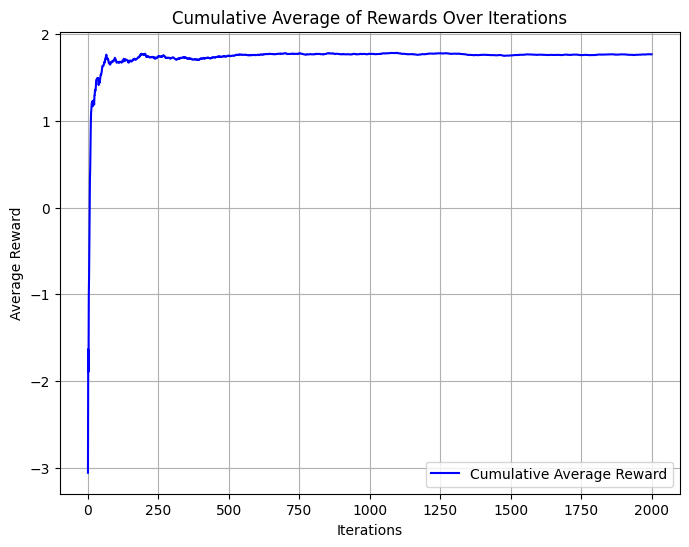

Total Rewards: 3532.1395286616707
Final Average Reward: 1.7661


In [533]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cumulative average of rewards
cumulative_average = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot the cumulative average
plt.figure(figsize=(8, 6))
plt.plot(cumulative_average, label='Cumulative Average Reward', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Cumulative Average of Rewards Over Iterations')
plt.legend()
plt.grid()
plt.show()

# Optional: Print final statistics
print(f"Total Rewards: {sum(rewards)}")
print(f"Final Average Reward: {cumulative_average[-1]:.4f}")


## $\epsilon$-greedy Algorithm

In [534]:

   def run_epsilon_greedy(bandits, epsilon, iterations=2000):
    """
    ε-greedy algorithm: Explore with probability ε, exploit otherwise.
    """
    rewards = []
    estimates = [0.0] * len(bandits)
    counts = [0] * len(bandits)
    
    for _ in range(iterations):
        # ε-greedy action selection
        if random.random() < epsilon:
            action = random.randint(0, len(bandits) - 1)  # Explore
        else:
            action = max(range(len(bandits)), key=lambda a: estimates[a])  # Exploit
        
        # Pull the lever of the selected action
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        # Update estimates
        counts[action] += 1
        estimates[action] += (reward - estimates[action]) / counts[action]
    
    return rewards



Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [535]:
rewards = run_epsilon_greedy(bandits, epsilon=0.1)


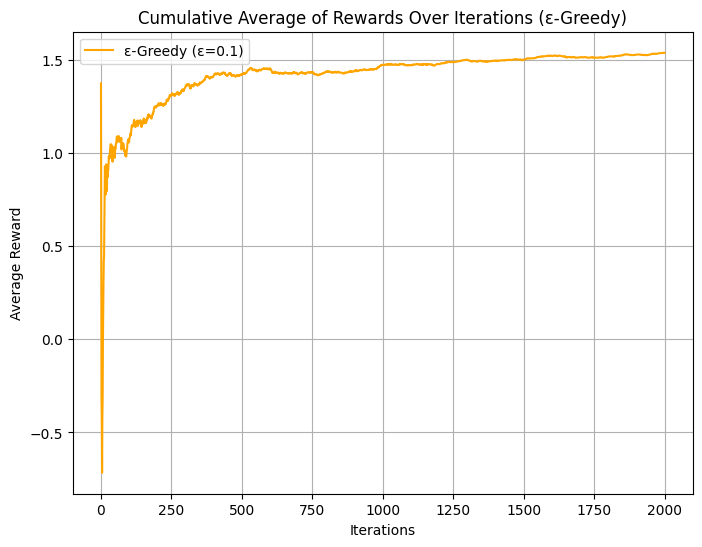

Total Rewards: 3073.02767044208
Final Average Reward: 1.5365


In [536]:
import matplotlib.pyplot as plt
import numpy as np

# Run the epsilon-greedy algorithm
epsilon = 0.1  # Adjust epsilon as needed
rewards = run_epsilon_greedy(bandits, epsilon)

# Compute cumulative average rewards
cumulative_average = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot the cumulative average rewards
plt.figure(figsize=(8, 6))
plt.plot(cumulative_average, label=f'ε-Greedy (ε={epsilon})', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Cumulative Average of Rewards Over Iterations (ε-Greedy)')
plt.legend()
plt.grid()
plt.show()

# Optional: Print final statistics
print(f"Total Rewards: {sum(rewards)}")
print(f"Final Average Reward: {cumulative_average[-1]:.4f}")


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [537]:
import matplotlib.pyplot as plt

def find_optimal_epsilon(bandits, epsilons=[0, 0.01, 0.1, 0.2], iterations=2000):
    """
    Compare different ε values to find the optimal one.
    """
    for epsilon in epsilons:
        rewards = run_epsilon_greedy(bandits, epsilon, iterations)
        cumulative_rewards = [sum(rewards[:i+1]) / (i+1) for i in range(len(rewards))]
        plt.plot(cumulative_rewards, label=f"ε = {epsilon}")
    
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.title("Comparison of ε values in ε-Greedy Algorithm")
    plt.show()


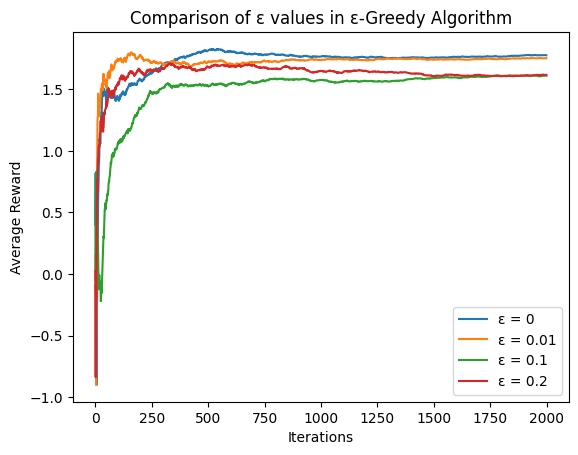

In [538]:

find_optimal_epsilon(bandits)


## Optimistic Initial Values

In [539]:
def run_non_optimistic(bandits, initial_value=0, iterations=2000):
    """
    Non-optimistic greedy algorithm: Start with zero initial estimates.
    """
    rewards = []
    estimates = [initial_value] * len(bandits)
    counts = [0] * len(bandits)
    
    for _ in range(iterations):
        # Select the action with the highest estimate
        action = max(range(len(bandits)), key=lambda a: estimates[a])
        
        # Pull the lever of the selected action
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        # Update estimates
        counts[action] += 1
        estimates[action] += (reward - estimates[action]) / counts[action]
    
    return rewards

# Define the optimistic greedy function (from your original code)
def run_optimistic_greedy(bandits, initial_value=10, iterations=2000):
    """
    Optimistic greedy algorithm: Start with optimistic initial estimates.
    """
    rewards = []
    estimates = [initial_value] * len(bandits)
    counts = [0] * len(bandits)
    
    for _ in range(iterations):
        # Select the action with the highest optimistic estimate
        action = max(range(len(bandits)), key=lambda a: estimates[a])
        
        # Pull the lever of the selected action
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        # Update estimates
        counts[action] += 1
        estimates[action] += (reward - estimates[action]) / counts[action]
    
    return rewards



Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [540]:
# Run the algorithms
rewards_optimistic = run_optimistic_greedy(bandits)  # Updated function name

# If you have another function for non-optimistic initialization:
rewards_non_optimistic = run_non_optimistic(bandits)

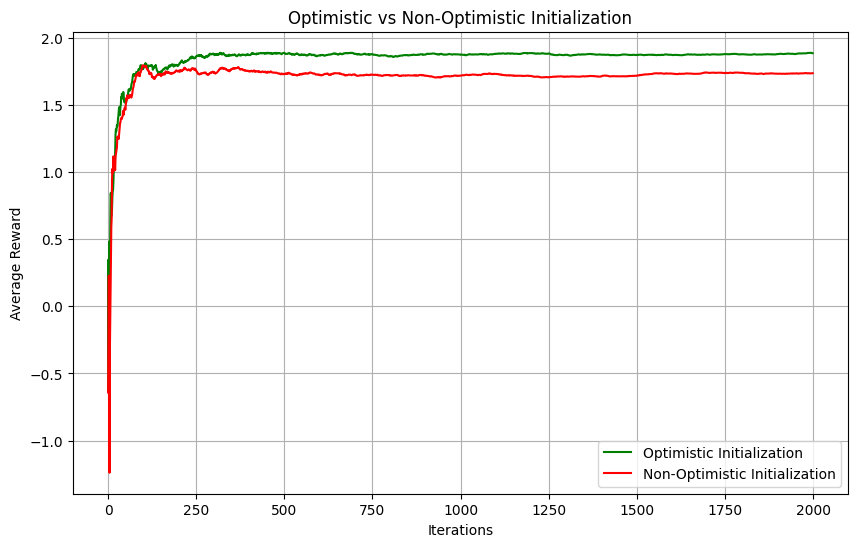

In [541]:


# Compute cumulative averages
cumulative_avg_optimistic = np.cumsum(rewards_optimistic) / np.arange(1, len(rewards_optimistic) + 1)
cumulative_avg_non_optimistic = np.cumsum(rewards_non_optimistic) / np.arange(1, len(rewards_non_optimistic) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg_optimistic, label='Optimistic Initialization', color='green')
plt.plot(cumulative_avg_non_optimistic, label='Non-Optimistic Initialization', color='red')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Optimistic vs Non-Optimistic Initialization')
plt.legend()
plt.grid()
plt.show()


## Optional - Upper Confidence Bound (UCB)

In [542]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass